# BP网络/全连接神经网络

BP网络为前向映射网络，网络由输入层、隐藏层以及输出层组成。

## 基本单元

BP网络的基本单元为含有激活函数的单个神经元

$$o = f(x) = f(\omega \cdot \textbf{x} + b) \\ \omega = [\omega_1, \omega_2, \cdots, \omega_n]^T \\ x = [x_1, x_2, \cdots, x_n]^T$$

其中，$o$为输出，$\omega$为权重向量， $\textbf{x}$ 为输入向量，$b$ 为偏执, $f$为激活函数

根据不同的任务类型，可以选用不同的激活函数

## 基本架构

通过多个基本单元组成一层，然后通过多层组成整个BP网络

## BP网络的学习算法

BP网络学习算法由两部分组成
* 前向计算
* 误差反向传播

其中，前向传播过程是网络的应用过程；误差反向传播过程是BP网络权值学习和训练过程。

**核心思想**：将输出误差以**某种形式**从输出层传播到隐藏层最后到输入层。因此，对于BP网络学习算法，最为重要的就是决定误差传播方式

### 符号运算实现误差反向传播

符号运算实现的误差反向传播方式要求首先对梯度进行符号运算并表示成已知量的运算，即**显式**的对每一个神经元的梯度运算进行推导。然后通过带入相应的量求得梯度，实现误差的传播和参数更新。

### 自动微分实现误差反向传播

自动微分实现的误差反向传播本质上是链式法则以及递归思想的综合。其不要求给出**显式**的每一个神经元的梯度计算符号表达式，而是根据链式法则以及递归，以深度优先搜索的方式对整个计算图中的待优化参数进行梯度计算。

自动微分实现误差反向传播要求事先给出每一个运算的微分计算方式，即每一个运算不仅要给出其运算结果还需要给出其对应的微分计算方式。**对于不可导的位置，需要手动给出对应的微分结果**，例如在ReLU激活函数中，0位置不可导，因此需要手动赋予该处的导数为0.

## 三层BP网络误差传递的符号推导

### 定义
定义一个三层BP网络，即输入层、一层隐藏层以及输出层

参数定义如下：

* 输入向量
$$\begin{equation} \textbf{x} = (x_1, x_2, \cdots, x_n)^T, \textbf{x}\in\mathcal{R}^n \end{equation}$$
* 输入层到隐藏层权重
$$\begin{equation} \textbf{V}=\left[\begin{array}{cc} V_{11}&V_{12}& \cdots&V_{1n} \\ \vdots&\vdots&\ddots&\vdots \\ V_{m1}&V_{m2}&\cdots&V_{mn} \end{array}\right], \textbf{V}\in\mathcal{R}^{m\times n} \end{equation}$$
* 隐藏层激活函数
$$\begin{equation} f_1(\textbf{V}\textbf{x}) \end{equation}$$
* 隐藏层输出
$$\begin{equation} \textbf{h} = (h_1, h_2, \cdots, h_m)^T, \textbf{h}\in\mathcal{R}^m \end{equation}$$
* 隐藏层到输出权重
$$\begin{equation} \textbf{W} = \left[\begin{array}{cc} W_{11}&W_{12}& \cdots&W_{1m} \\ \vdots&\vdots&\ddots&\vdots \\ W_{k1}&W_{k2}&\cdots&W_{km} \end{array}\right], \textbf{W}\in\mathcal{R}^{k\times m} \end{equation}$$
* 输出层激活函数
$$\begin{equation} f_2(\textbf{\textbf{W}\textbf{h}}) \end{equation}$$
* 输出层输出
$$\begin{equation} \textbf{o} = (o_1, o_2, \cdots, o_k)^T, \textbf{o}\in\mathcal{R}^k \end{equation}$$
* 期望输出
$$\begin{equation} \textbf{y} = (y_1, y_2, \cdots, y_k)^T, \textbf{o}\in\mathcal{R}^k \end{equation}$$

### 正向运算过程

* 给定输入向量
$$\begin{equation} x_i = (x_{i1}, x_{i2}, \cdots, x_{in})^T \end{equation}$$
* 计算隐藏层输出
$$\begin{equation} \begin{split} \textbf{h}_i &= (h_{i1}, h_{i2}, \cdots, h_{im})^T \\ &= f_1(\sum_{i=0}^nv_{1i}x_i, \sum_{i=0}^nv_{2i}x_i, \cdots, \sum_{i=0}^nv_{mi}x_i) \\ &= f_1(\textbf{v}\textbf{x}) \end{split} \end{equation}$$
* 计算预测输出
$$\begin{equation} \begin{split} \textbf{o}_i &= (o_{i1}, o_{i2}, \cdots, o_{ik})^T \\ &= f_2(\sum_{i=0}^mW_{1i}h_i, \sum_{i=0}^mW_{2i}h_i, \cdots, \sum_{i=0}^mW_{ki}h_i) \\ &= f_2(\textbf{W}\textbf{h}) \end{split} \end{equation}$$
* 计算损失
    * 单个输入输出的损失
$$\begin{equation} \mathcal{L}_i(\textbf{V}, \textbf{W}) = ||\textbf{o}_i-\textbf{y}_i||_2^2\end{equation}$$
    * 总损失
$$\begin{equation} \mathcal{L}(\textbf{V}, \textbf{W}) = \sum_{i=0}^t||\textbf{o}_i-\textbf{y}_i||_2^2\end{equation}$$
* 优化问题
$$\begin{equation} \min\limits_{\textbf{V}, \textbf{W}}\mathcal{L}(\textbf{V}, \textbf{W}) = \sum_{i=0}^t||\textbf{o}_i-\textbf{y}_i||_2^2 \end{equation}$$

### 误差反向传播过程（单样本输入）

* 误差传递到输出层
$$\begin{equation}\begin{split} 
\frac{\partial\mathcal{L}(\textbf{V}, \textbf{W})}{\partial{\textbf{o}}} 
&= \frac{\partial ||\textbf{o}-\textbf{y}||_2^2}{\partial{\textbf{o}}} \\ 
&= \frac{\partial{\sum_{j=1}^k(o_j-y_j)^2}}{\partial{\textbf{o}}}\\
&= [\frac{\partial{\sum_{j=1}^k(o_j-y_j)^2}}{\partial{o_1}}, \frac{\partial{\sum_{j=1}^k(o_j-y_j)^2}}{\partial{o_2}}, \cdots, \frac{\partial{\sum_{j=1}^k(o_j-y_j)^2}}{\partial{o_k}}]\\
&= [2(o_1-y_1), 2(o_2-y_2), \cdots, 2(o_k-y_k)] \\
&= 2(\textbf{o}-\textbf{y})^T\\
\end{split}\end{equation}$$
* 误差传递到隐藏层
    * 对于隐藏层到输出层的权重有
$$
\begin{equation}
    \begin{split} 
    \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{W}} 
    &= \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{o}_i} \frac{\partial{\textbf{o}_i}}{\partial{\textbf{W}\textbf{h}}} \frac{\partial{\textbf{W}\textbf{h}}}{\partial{\textbf{W}}}
\end{split}
\end{equation}
$$
$$
\begin{equation}
    \frac{\partial{\textbf{o}}}{\partial{\textbf{W}\textbf{h}}} = \frac{\partial{f_2(\textbf{W}\textbf{h})}}{\partial{\textbf{W}\textbf{h}}} = diag(f_2^{\prime}(\textbf{W}\textbf{h}))
\end{equation}
$$
由式-15、式-16以及式-17可得
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{W}\textbf{h}} 
    &= 2(\textbf{o}-\textbf{y})^Tdiag(f_2^{\prime}(\textbf{W}\textbf{h}))\\
    &= \boldsymbol{\delta_1} \\
    &= [\delta_{11}, \delta_{12}, \cdots, \delta_{1k}]
    \end{split}
\end{equation}
$$
考虑到$\textbf{W}\textbf{h}$为向量，$\textbf{W}$为矩阵，其直接微分会得到一个$k\times k \times m$的张量，这样不便于操作。考虑使用分量表示，即将$\textbf{W}\textbf{h}$表示为k个分量，分别操作。
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{W}}
    &= \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{W}\textbf{h}} \frac{\partial{\textbf{W}\textbf{h}}}{\partial{\textbf{W}}} \\
    &= \boldsymbol\delta_1 \frac{\partial{\textbf{W}\textbf{h}}}{\partial{\textbf{W}}}\\
    &= \sum_{j=1}^k\delta_{1j}\frac{\partial{\sum_{i=1}^mW_{ji}h_i}}{\partial{\textbf{W}}}\\
    &= \boldsymbol{\delta_1}^T\textbf{h}^T \\
    \end{split}
\end{equation}
$$
    * 对于隐藏层的输入有
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\mathcal{L}(\textbf{V}, \textbf{W})}}{\partial{\textbf{h}}}
    &= \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{W}\textbf{h}} \frac{\partial{\textbf{W}\textbf{h}}}{\partial{\textbf{h}}}\\
    &= \boldsymbol\delta_1 \frac{\partial{\textbf{W}\textbf{h}}}{\partial{\textbf{h}}}\\
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\textbf{W}\textbf{h}}}{\partial{\textbf{h}}}
    &= \frac{\partial{((\sum_{i=1}^mW_{1i}h_i, \sum_{i=1}^mW_{2i}h_i, \cdots, \sum_{i=1}^mW_{ki}h_i)^T)}}{\partial{((h_1, h_2, \cdots, h_m)^T)}}\\
    &= 
        \left[\begin{array}{cc}
        W_{11}&W_{12}&\cdots&W_{1m}\\
        \vdots&\ddots&\ddots&\vdots\\
        W_{k1}&W_{k2}&\cdots&W_{km}
        \end{array}\right]\\
    &= \textbf{W}
    \end{split}
\end{equation}
$$
由式-20和式-21可得
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\mathcal{L}(\textbf{V}, \textbf{W})}}{\partial{\textbf{h}}}
    &= \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{W}\textbf{h}} \frac{\partial{\textbf{W}\textbf{h}}}{\partial{\textbf{h}}}\\
    &= \boldsymbol\delta_1 \textbf{W}\\
    \end{split}
\end{equation}
$$
* 误差传递到输入层
    * 对于输入层到隐藏层的权重有
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\mathcal{L}(\textbf{V}, \textbf{W})}}{\partial{\textbf{V}}}
    &= \frac{\partial{\mathcal{L}(\textbf{V}, \textbf{W})}}{\partial{\textbf{h}}} \frac{\partial{\textbf{h}}}{\partial\textbf{V}\textbf{x}} \frac{\partial{\textbf{V}\textbf{x}}}{\partial\textbf{V}}
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\textbf{h}}}{\partial\textbf{V}\textbf{x}}
    &= \frac{\partial{f_1(\textbf{V}\textbf{x})}}{\partial{\textbf{V}\textbf{x}}} = diag(f_1^{\prime}(\textbf{V}\textbf{x}))
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\mathcal{L}(\textbf{V}, \textbf{W})}}{\partial{\textbf{h}}} \frac{\partial{\textbf{h}}}{\partial{\textbf{V}\textbf{x}}}
    &= \boldsymbol{\delta_1}\textbf{W}diag(f_1^{\prime}(\textbf{V}\textbf{x}))\\
    &= \boldsymbol{\delta_2}\\
    &= [\delta_{21}, \delta_{22}, \cdots, \delta_{2m}]
    \end{split}
\end{equation}
$$
同上分析，考虑到$\textbf{V}\textbf{x}$为向量，$\textbf{V}$为矩阵，其直接微分会得到一个$m\times m \times n$的张量，这样不便于操作。考虑使用分量表示，即将$\textbf{V}\textbf{x}$表示为k个分量，分别操作。
$$
\begin{equation}
    \begin{split}
    \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{V}}
    &= \frac{\partial{\mathcal{L}(\textbf{V},\textbf{W})}}{\partial\textbf{V}\textbf{x}} \frac{\partial{\textbf{V}\textbf{x}}}{\partial{\textbf{V}}} \\
    &= \boldsymbol\delta_2 \frac{\partial{\textbf{V}\textbf{x}}}{\partial{\textbf{V}}}\\
    &= \sum_{j=1}^m\delta_{2j}\frac{\partial{\sum_{i=1}^nV_{ji}x_i}}{\partial{\textbf{V}}}\\
    &= \boldsymbol{\delta_2}^T\textbf{x}^T \\
    \end{split}
\end{equation}
$$
* 综上可得
待优化参数为$\textbf{W}$和$\textbf{V}$
其中：
$$
\begin{equation}
    \begin{split}
    \frac{\partial\mathcal{L}(\textbf{V}, \textbf{W})}{\partial{\textbf{W}}}
    &= \boldsymbol{\delta_1}^T\textbf{h}^T\\
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \frac{\partial\mathcal{L}(\textbf{V}, \textbf{W})}{\partial{\textbf{V}}}
    &= \boldsymbol{\delta_2}^T\textbf{x}^T\\
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \boldsymbol{\delta_1} = 2(\textbf{o}-\textbf{y})^Tdiag(f_2^{\prime}(\textbf{W}\textbf{h}))
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \boldsymbol{\delta_2} = \boldsymbol{\delta_1}\textbf{W}diag(f_1^{\prime}(\textbf{V}\textbf{x}))
    \end{split}
\end{equation}
$$

对于不同的激活函数有不同的导数值
* Sigmoid
$$
\begin{equation}
S(x)=\frac{1}{1+e^{-x}}
\end{equation}
$$
$$
\begin{equation}
S^{\prime}(x)=\frac{e^{-x}}{(1+e^{-x})^2}=S(x)(1-S(x))
\end{equation}
$$
* ReLU
$$
\begin{equation}
R(x) = \left\{ \begin{array}{cc} x,&x>0\\0,&x\leq0 \end{array} \right.
\end{equation}
$$
$$
\begin{equation}
R^{\prime}(x) = \left\{ \begin{array}{cc} 1,&x>0\\0,&x\leq0 \end{array} \right.
\end{equation}
$$
* Tanh
$$
\begin{equation}
T(x) = \tanh{x} = \frac{e^x-e^{-x}}{e^x+e^{-x}}
\end{equation}
$$
$$
\begin{equation}
T^{\prime}(x) = (\tanh{x})^{\prime} = 1 - \tanh^2x
\end{equation}
$$

若激活函数$f_1$和$f_2$均为Sigmoid则有
$$
\begin{equation}
    \begin{split}
    \boldsymbol{\delta_1} = 2(\textbf{o}-\textbf{y})^Tdiag(S(\textbf{W}\textbf{h})\cdot(1-S(\textbf{W}\textbf{h})))
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \boldsymbol{\delta_2} = \boldsymbol{\delta_1}\textbf{W}diag(S(\textbf{V}\textbf{x})\cdot(1-S(\textbf{V}\textbf{x})))
    \end{split}
\end{equation}
$$

基于符号运算的微分计算方法存在推导复杂的问题，尤其是对于层数较多的神经网络。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import imageio
import os
import random
from sklearn.datasets import make_blobs, make_moons

# seed
random.seed(1024)
np.random.seed(1024)
%matplotlib inline

In [2]:
# 定义三层神经网络

class MyBPNetwork(object):

    def __init__(self, input_dims, hidden_dims, output_dims, lr) -> None:
        super().__init__()

        # 模型权重
        random.seed(1024)
        np.random.seed(1024)
        self.weight_input2hidden = np.random.randn(hidden_dims, input_dims+1)
        self.weight_hidden2output = np.random.randn(output_dims, hidden_dims)
        
        # 激活函数
        self.activate = self.activate_func
        self.activate_dif = self.activate_dif_func

        # 中间结果
        self.input_data = None
        self.hidden_value = None
        self.hidden_activate_value = None

        # 梯度结果
        self.grad_hidden2output = None
        self.grad_input2hidden = None

        # 学习率
        self.lr = lr

    def forward(self, input_data):
        """
        正向计算
        """
        
        # 扩展一个维度
        one_array = np.ones(len(input_data)).reshape(-1, 1)
        self.input_data = np.concatenate((input_data, one_array), axis=1)
        # input data : (batch, input_dims+1)

        # 计算隐藏层
        self.hidden_value = np.matmul(self.weight_input2hidden, self.input_data.T)
        self.hidden_activate_value = self.activate_func(self.hidden_value)
        # hidden_value: (hidden_dim, batch)

        # 计算输出
        output_value = np.matmul(self.weight_hidden2output, self.hidden_activate_value)
        # output_value: (output_dim, batch)

        return output_value.T
    
    def backward(self, label, pred):
        """
        梯度反向传播
        """

        # label: (batch, output_dim)
        # pred: (batch, output_dim)

        theta_1 = 2 * np.matmul(pred - label, np.eye(pred.shape[1]))
        # theta_1: (batch, output_dim)
        theta_2 = np.zeros((theta_1.shape[0], self.weight_hidden2output.shape[1]))
        for i in range(theta_1.shape[0]):
            theta_2[i, :] = np.matmul(np.matmul(theta_1[i:i+1, :], self.weight_hidden2output), 
                                      np.diag(self.activate_dif_func(self.hidden_activate_value[:, i]))).reshape(-1)

        # theta_2: (batch, hidden_dim)

        # 计算隐藏层到输出层权重的梯度
        self.grad_hidden2output = np.matmul(theta_1.T, self.hidden_value.T)
        # 计算输入层到隐藏层权重的梯度
        self.grad_input2hidden = np.matmul(theta_2.T, self.input_data)
    
    def optimize(self):
        """
        优化
        """
        self.weight_input2hidden -= self.grad_input2hidden * self.lr
        self.weight_hidden2output -= self.grad_hidden2output * self.lr


    @staticmethod
    def activate_func(x):
        """
        sigmoid
        """
        return 1/(1+np.e ** (-x))
    
    @staticmethod
    def activate_dif_func(activate_result):
        return activate_result*(1-activate_result)

In [3]:
# 测试数据

batch_size = 5
input_dims = 2
output_dims = 1
hidden_num = 5
lr = 1e-3

test_input_array = np.ones((batch_size, input_dims))
test_output_array = np.random.randint(0, 2, (batch_size, output_dims))
test_model = MyBPNetwork(input_dims=input_dims, 
                         hidden_dims=hidden_num, 
                         output_dims=output_dims, 
                         lr=lr)

# 正向运算
test_pred = test_model.forward(test_input_array)
# 反向传播
test_model.backward(test_output_array, test_pred)
print("before optimize")
print("input to hidden weight")
print(test_model.weight_input2hidden)
print("hidden to output weight")
print(test_model.weight_hidden2output)
# 优化更新
test_model.optimize()
print("after optimize")
print("input to hidden weight")
print(test_model.weight_input2hidden)
print("hidden to output weight")
print(test_model.weight_hidden2output)

before optimize
input to hidden weight
[[ 2.12444863  0.25264613  1.45417876]
 [ 0.56923979  0.45822365 -0.80933344]
 [ 0.86407349  0.20170137 -1.87529904]
 [-0.56850693 -0.06510141  0.80681666]
 [-0.5778176   0.57306064 -0.33667496]]
hidden to output weight
[[ 0.29700734 -0.37480416  0.15510474  0.70485719  0.8452178 ]]
after optimize
input to hidden weight
[[ 2.12444463  0.25264213  1.45417477]
 [ 0.56929974  0.4582836  -0.80927349]
 [ 0.86405209  0.20167997 -1.87532044]
 [-0.56862017 -0.06521465  0.80670342]
 [-0.5779505   0.57292774 -0.33680786]]
hidden to output weight
[[ 0.29452679 -0.37494538  0.15562887  0.70474505  0.84543886]]


In [4]:
# 数据
class DataCreator(object):

    def __init__(self) -> None:
        super().__init__()

    @staticmethod
    def get_and_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, -1, -1, 1]
        return x_list, y_list

    @staticmethod
    def get_or_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, 1, 1, 1]
        return x_list, y_list

    @staticmethod
    def get_nor_data(nor_index):
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = list()
        for i in range(len(x_list)):
            if x_list[i][nor_index]:
                y_list.append(-1)
            else:
                y_list.append(1)
        
        return x_list, y_list

    @staticmethod
    def get_xor_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, 1, 1, -1]
        return x_list, y_list

    @staticmethod
    def get_moon_data(sample_num, noise=0.05):
        x_list, y_list = make_moons(sample_num, noise=noise, random_state=1024)
        y_list = y_list * 2 - 1
        return x_list, y_list

    @staticmethod
    def get_blob_data(sample_num, std=0.3):
        x_list, y_list = make_blobs(n_samples=sample_num, centers=2, 
                                    cluster_std=std, random_state=1024, center_box=(-2, 2))
        y_list = y_list * 2 - 1
        return x_list, y_list

# 数据集
class DataSet(object):

    def __init__(self, input_x_list, output_y_list) -> None:
        super().__init__()

        self.input_x = input_x_list
        self.output_y = output_y_list

    def __len__(self):
        return len(self.input_x)
    
    def __getitem__(self, item):
        input_x = self.input_x[item]
        output_y = np.array(self.output_y[item]).reshape((1, -1))

        return {"input": input_x, "output": output_y}
    
    @staticmethod
    def collate_fn(batch):
        input_x = np.array([s["input"] for s in batch])
        output_y = np.array([s["output"][0] for s in batch])
        return {"inputs": input_x, "label": output_y}


# 数据加载器迭代器
class DataLoaderIter(object):

    def __init__(self, data_set, iter_index) -> None:
        super().__init__()
        self.data_set = data_set
        self.iter_index = iter_index
        self.counter = 0
        self.max_iter = len(self.iter_index)
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.counter == self.max_iter:
            raise StopIteration
        else:
            index_list = self.iter_index[self.counter]
            batch_data = list()

            # 获取数据
            for ind in index_list:
                batch_data.append(self.data_set.__getitem__(ind))
            # 整合数据
            return_data = self.data_set.collate_fn(batch_data)
            self.counter += 1
            return return_data

# 数据加载器
class DataLoader(object):

    def __init__(self, dataset, batch_size, shuffle) -> None:
        super().__init__()

        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

        # 迭代器
        # 索引分段
        split_index = np.arange(0, len(self.dataset), self.batch_size)[1:]
        # 迭代列表
        if self.shuffle:
            iter_num = np.random.permutation(len(self.dataset))
        else:
            iter_num = np.arange(0, len(self.dataset), 1)
        
        # 获取迭代索引列表
        self.iter_index_list = np.hsplit(iter_num, split_index)

    def __iter__(self):
        # 定义迭代器
        self.DataIter = DataLoaderIter(self.dataset, self.iter_index_list)
        return self.DataIter

    def __len__(self):
        # 最大迭代次数
        return len(self.iter_index_list)

In [22]:
def get_split_face_point(input_range, model, thred=0.01):
    assert np.shape(input_range) == (2, 2)

    x_1_list = np.linspace(input_range[0][0], input_range[0][1], 500)
    x_2_list = np.linspace(input_range[1][0], input_range[1][1], 500)

    pred_matrix = np.zeros((500, 500))

    for i in range(500):
        x_2_input = np.ones_like(x_1_list) * x_2_list[i]
        x_input = np.concatenate((x_1_list.reshape(-1, 1), 
                                  x_2_input.reshape(-1, 1)), axis=1)

        pred_matrix[i, :] = model.forward(x_input).reshape(-1)
    
    mask_1 = (pred_matrix < thred).astype(np.int32)
    mask_2 = (pred_matrix > -thred).astype(np.int32)

    mask_total = np.multiply(mask_1, mask_2)

    point_list = np.argwhere(mask_total == 1)

    point_list = point_list[np.argsort(x_1_list[point_list[:, 1]])]

    return [x_1_list[point_list[:, 1]], x_2_list[point_list[:, 0]]]


def draw(input_x_list, output_y_list, loss_list, split_points_list, count):
    input_x_list = np.array(input_x_list.copy())
    input_dim = np.shape(input_x_list)[1]
    if np.shape(input_x_list)[1] != 2:
        raise ValueError("仅能绘制输入维度为2的结果，但是接受到的维度为{}".format(input_dim))
    
     # 设置标记点
    input_x_1_range = [np.min(input_x_list[:, 0]), np.max(input_x_list[:, 0])]
    input_x_2_range = [np.min(input_x_list[:, 1]), np.max(input_x_list[:, 1])]
    # 区间长度
    x_1_len = input_x_1_range[1] - input_x_1_range[0]
    x_2_len = input_x_2_range[1] - input_x_2_range[0]

    # 绘制所有训练数据
    plt.cla()
    plt.clf()
    plt.subplot(1, 2, 1)
    plt.scatter(input_x_list[:, 0], input_x_list[:, 1], c=output_y_list)
    plt.scatter(split_points_list[0], split_points_list[1], color="r", s=0.1)

    plt.xlim(input_x_1_range[0]-0.2*x_1_len, input_x_1_range[1]+0.2*x_1_len)
    plt.ylim(input_x_2_range[0]-0.2*x_2_len, input_x_2_range[1]+0.2*x_2_len)
    plt.xlabel("x1")
    plt.ylabel("x2")

    # 绘制损失曲线
    # 绘制训练损失曲线
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(0, len(loss_list), 1), loss_list)
    plt.xlabel("Epochs")
    plt.ylabel("Train loss")
    plt.title("Train loss - epochs")

    plt.savefig("./images/temp/{}.png".format(count), dpi=150)

def create_gif(epochs, output_name, fps=2, split=1):
    """
    生成gif
    """
    with imageio.get_writer("./images/{}.gif".format(output_name), mode="I", fps=fps) as Writer:
        for ind in range(epochs):
            if ind % split == 0:
                image = imageio.imread("./images/temp/{}.png".format(ind))
                os.remove("./images/temp/{}.png".format(ind))
                Writer.append_data(image)
        

### and逻辑

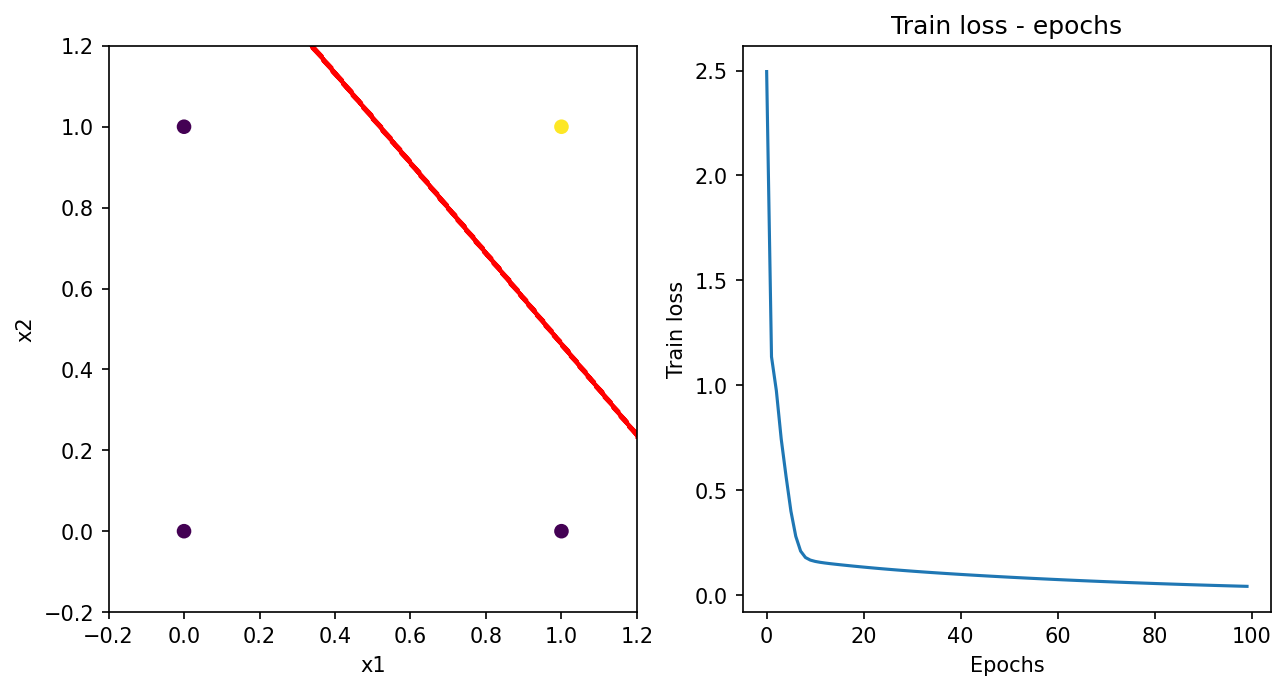

In [121]:
input_dims = 2
output_dims = 1
hidden_num = 5
lr = 0.1

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 100
# 获取训练数据
train_x_all, train_y_all = data_creator.get_and_data()

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)
train_loss_list = list()

plt.figure(figsize=(10, 5), dpi=150)
for epoch in range(max_epoch):

    train_loss = 0
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 预测
        pred_ = BP_model.forward(train_x)
        # 反向传播
        BP_model.backward(train_y, pred_)
        # 优化
        BP_model.optimize()

        train_loss += np.sum((pred_ - train_y) ** 2)
    
    train_loss_list.append(train_loss / len(train_dataset))

    # 获取分离面对应的预测矩阵
    split_points = get_split_face_point([[-0.2, 1.2], [-0.2, 1.2]], BP_model)
    draw(train_x_all, train_y_all, train_loss_list, split_points, epoch)
# 绘制
create_gif(max_epoch, "add_BPNetwork", fps=5)
plt.show() 

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/add_BPNetwork.gif "segment")

### or逻辑

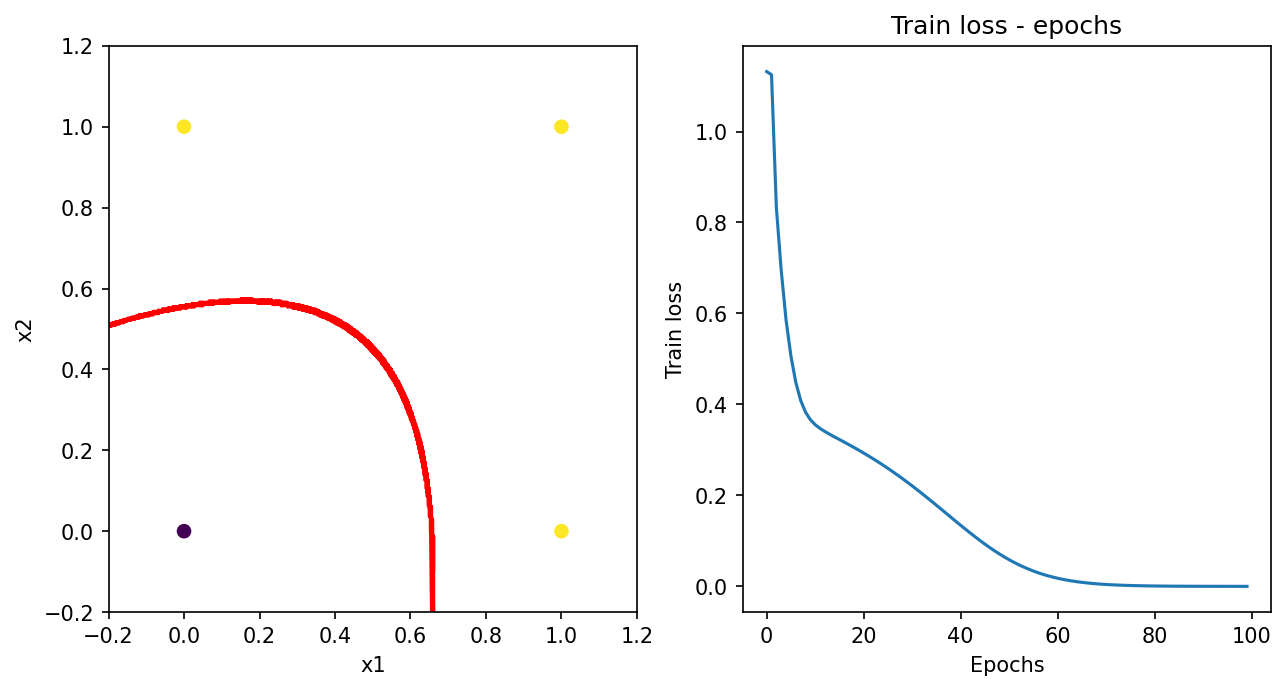

In [124]:
input_dims = 2
output_dims = 1
hidden_num = 5
lr = 0.1

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 100
# 获取训练数据
train_x_all, train_y_all = data_creator.get_or_data()

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)
train_loss_list = list()

plt.figure(figsize=(10, 5), dpi=150)
for epoch in range(max_epoch):

    train_loss = 0
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 预测
        pred_ = BP_model.forward(train_x)
        # 反向传播
        BP_model.backward(train_y, pred_)
        # 优化
        BP_model.optimize()

        train_loss += np.sum((pred_ - train_y) ** 2)
    
    train_loss_list.append(train_loss / len(train_dataset))

    # 获取分离面对应的预测矩阵
    split_points = get_split_face_point([[-0.2, 1.2], [-0.2, 1.2]], BP_model)
    draw(train_x_all, train_y_all, train_loss_list, split_points, epoch)
# 绘制
create_gif(max_epoch, "or_BPNetwork", fps=5)
plt.show() 

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/or_BPNetwork.gif "segment")

### Nor(x1)逻辑

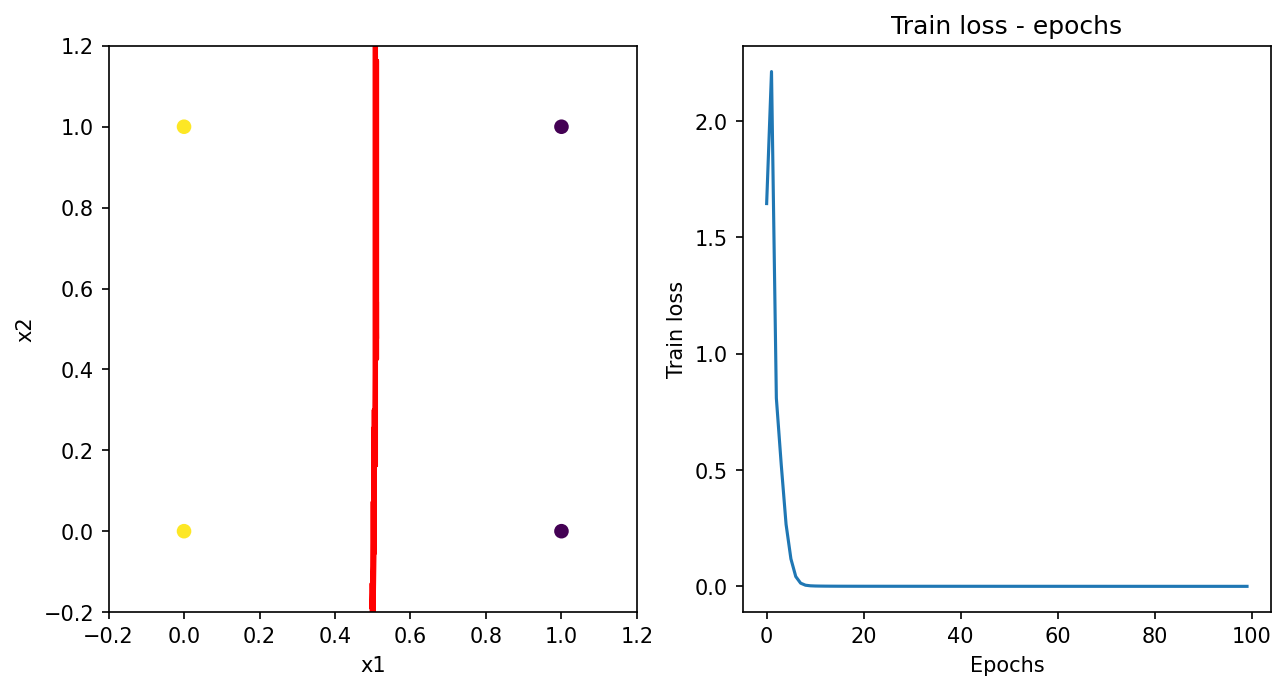

In [125]:
input_dims = 2
output_dims = 1
hidden_num = 5
lr = 0.1

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 100
# 获取训练数据
train_x_all, train_y_all = data_creator.get_nor_data(0)

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)
train_loss_list = list()

plt.figure(figsize=(10, 5), dpi=150)
for epoch in range(max_epoch):

    train_loss = 0
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 预测
        pred_ = BP_model.forward(train_x)
        # 反向传播
        BP_model.backward(train_y, pred_)
        # 优化
        BP_model.optimize()

        train_loss += np.sum((pred_ - train_y) ** 2)
    
    train_loss_list.append(train_loss / len(train_dataset))

    # 获取分离面对应的预测矩阵
    split_points = get_split_face_point([[-0.2, 1.2], [-0.2, 1.2]], BP_model)
    draw(train_x_all, train_y_all, train_loss_list, split_points, epoch)
# 绘制
create_gif(max_epoch, "nor_x1_BPNetwork", fps=5)
plt.show() 

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/nor_x1_BPNetwork.gif "segment")

### Nor(x2)逻辑

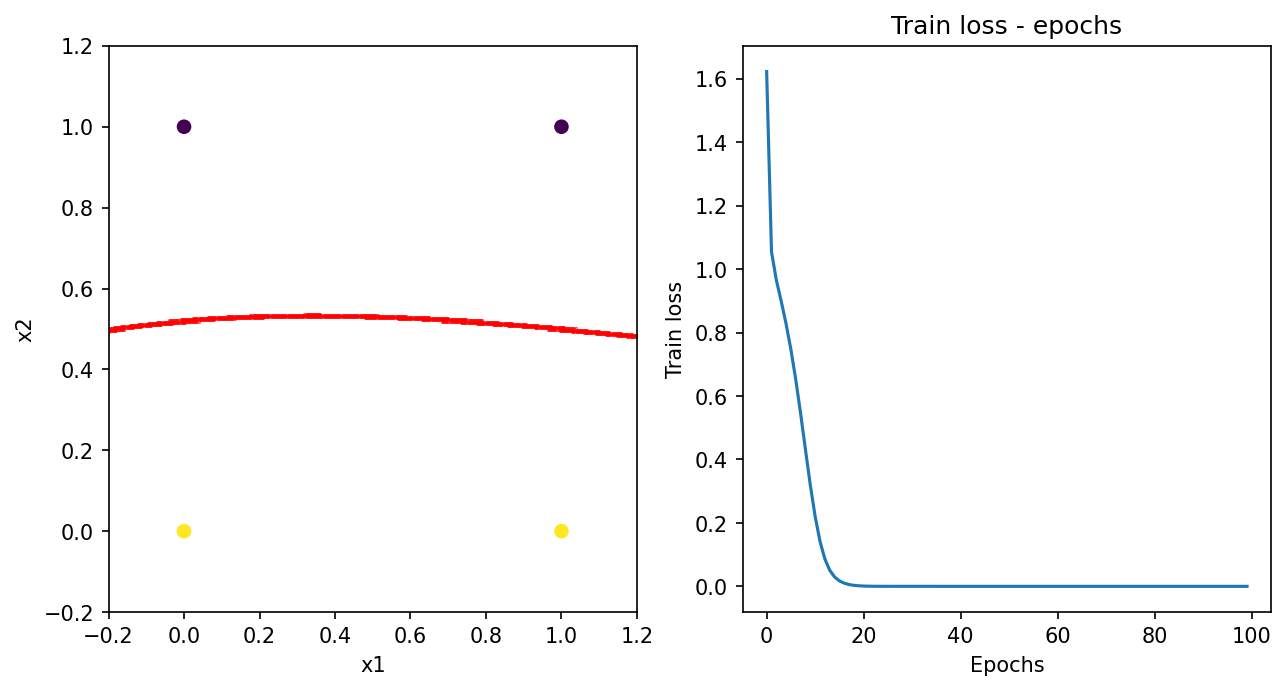

In [143]:
input_dims = 2
output_dims = 1
hidden_num = 5
lr = 0.1

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 100
# 获取训练数据
train_x_all, train_y_all = data_creator.get_nor_data(1)

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)
train_loss_list = list()

plt.figure(figsize=(10, 5), dpi=150)
for epoch in range(max_epoch):

    train_loss = 0
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 预测
        pred_ = BP_model.forward(train_x)
        # 反向传播
        BP_model.backward(train_y, pred_)
        # 优化
        BP_model.optimize()

        train_loss += np.sum((pred_ - train_y) ** 2)
    
    train_loss_list.append(train_loss / len(train_dataset))

    # 获取分离面对应的预测矩阵
    split_points = get_split_face_point([[-0.2, 1.2], [-0.2, 1.2]], BP_model)
    draw(train_x_all, train_y_all, train_loss_list, split_points, epoch)
# 绘制
create_gif(max_epoch, "nor_x2_BPNetwork", fps=5)
plt.show() 

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/nor_x2_BPNetwork.gif "segment")

### xoR逻辑

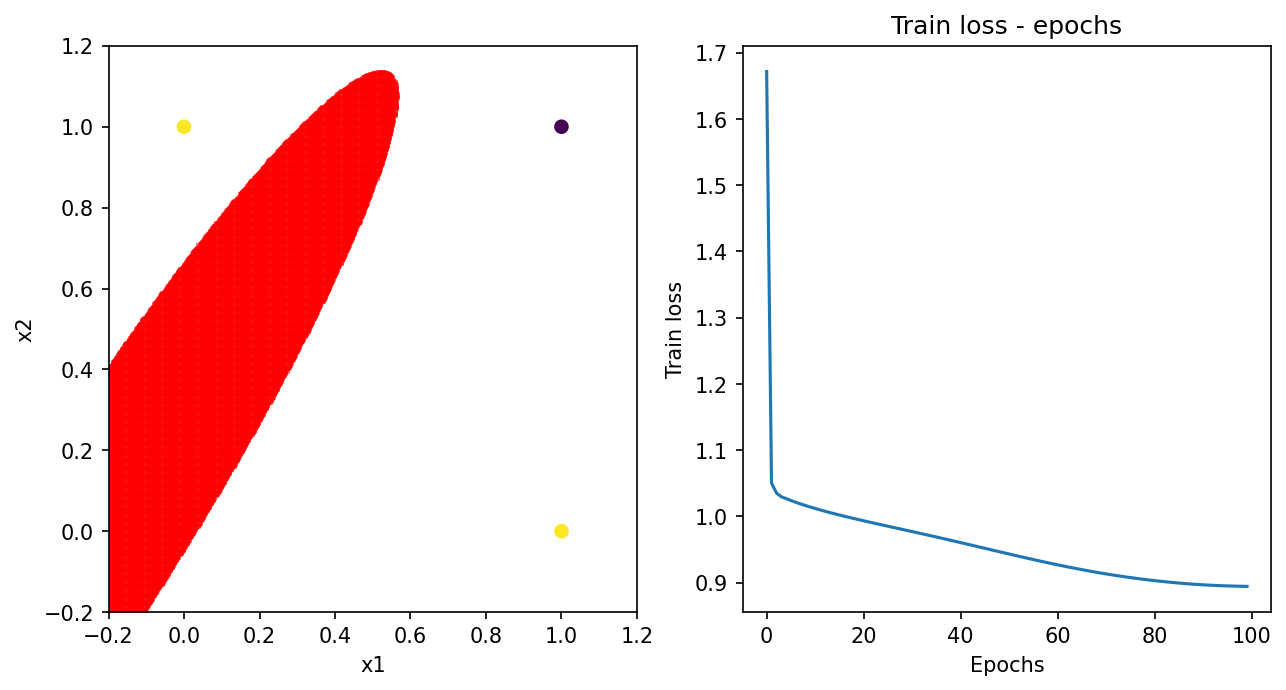

In [142]:
input_dims = 2
output_dims = 1
hidden_num = 5
lr = 0.1

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 100
# 获取训练数据
train_x_all, train_y_all = data_creator.get_xor_data()

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)
train_loss_list = list()

plt.figure(figsize=(10, 5), dpi=150)
for epoch in range(max_epoch):

    train_loss = 0
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 预测
        pred_ = BP_model.forward(train_x)
        # 反向传播
        BP_model.backward(train_y, pred_)
        # 优化
        BP_model.optimize()

        train_loss += np.sum((pred_ - train_y) ** 2)
    
    train_loss_list.append(train_loss / len(train_dataset))

    # 获取分离面对应的预测矩阵
    split_points = get_split_face_point([[-0.2, 1.2], [-0.2, 1.2]], BP_model, thred=0.01)
    draw(train_x_all, train_y_all, train_loss_list, split_points, epoch)
# 绘制
create_gif(max_epoch, "xor_BPNetwork", fps=5)
plt.show() 

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/xor_BPNetwork.gif "segment")

### 线性可分样本簇

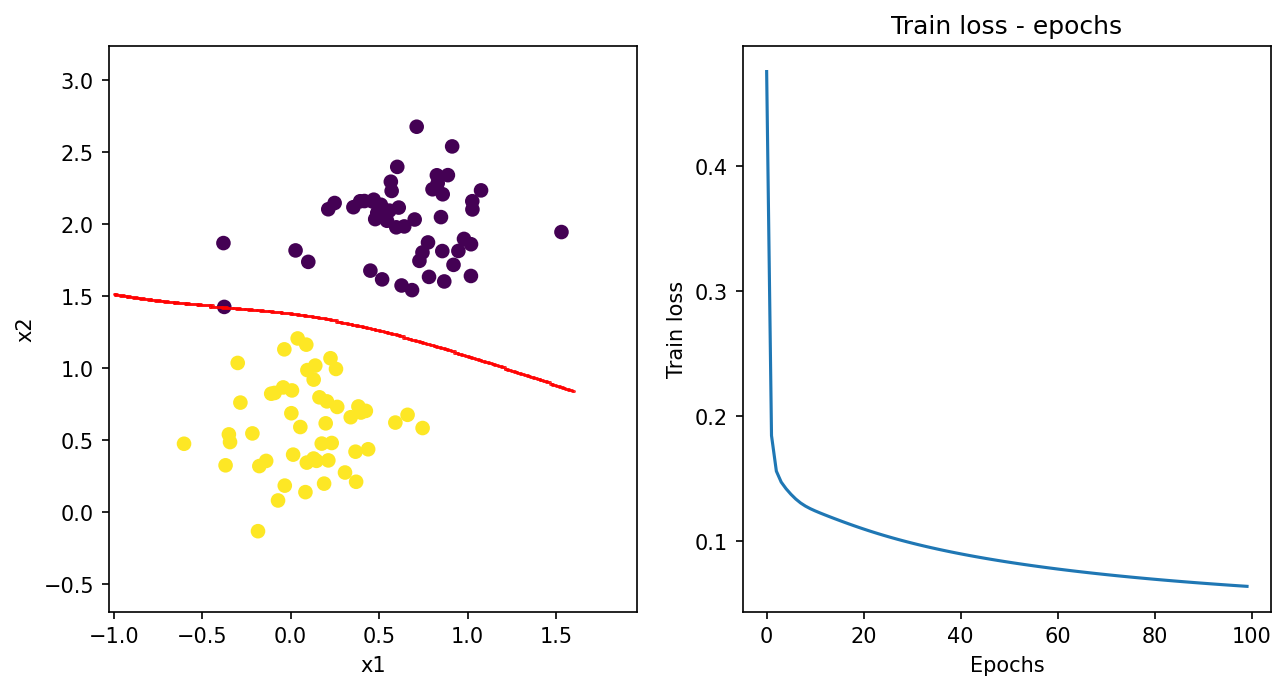

In [138]:
input_dims = 2
output_dims = 1
hidden_num = 5
lr = 0.05

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 100
# 获取训练数据
train_x_all, train_y_all = data_creator.get_blob_data(100, std=0.3)

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)
train_loss_list = list()

plt.figure(figsize=(10, 5), dpi=150)
for epoch in range(max_epoch):

    train_loss = 0
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 预测
        pred_ = BP_model.forward(train_x)
        # 反向传播
        BP_model.backward(train_y, pred_)
        # 优化
        BP_model.optimize()

        train_loss += np.sum((pred_ - train_y) ** 2)
    
    train_loss_list.append(train_loss / len(train_dataset))

    # 获取分离面对应的预测矩阵
    split_points = get_split_face_point([[-1, 1.6], [-0.5, 3.2]], BP_model)
    draw(train_x_all, train_y_all, train_loss_list, split_points, epoch)
# 绘制
create_gif(max_epoch, "blobs_BPNetwork", fps=5)
plt.show() 

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/blobs_BPNetwork.gif "segment")

### 线性不可分样本簇

0 0.8825217396925872
50 0.27058724006575313
100 0.12523380586402044
150 0.10212758632642148
200 0.09379042241649248
250 0.08856159216722391
300 0.08417996357140645
350 0.08005517019362371
400 0.07607255877614928
450 0.07229762378035201
500 0.06885144837809032
550 0.06581950148309978
600 0.06316354006338346
650 0.05760157655281877


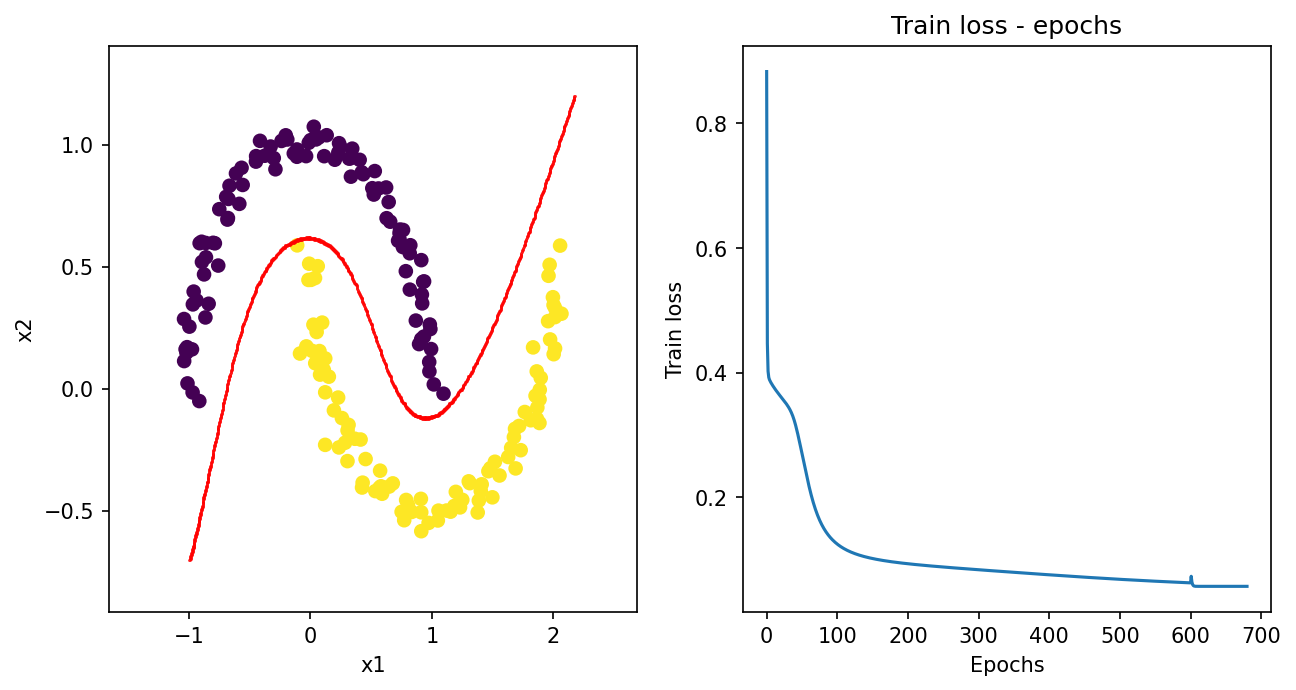

In [23]:
input_dims = 2
output_dims = 1
hidden_num = 15
lr = 0.005

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 700
# 获取训练数据
train_x_all, train_y_all = data_creator.get_moon_data(200)

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)
train_loss_list = list()

plt.figure(figsize=(10, 5), dpi=150)
for epoch in range(max_epoch):

    train_loss = 0
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 预测
        pred_ = BP_model.forward(train_x)
        # 反向传播
        BP_model.backward(train_y, pred_)
        # 优化
        BP_model.optimize()

        train_loss += np.sum((pred_ - train_y) ** 2)
    
    train_loss_list.append(train_loss / len(train_dataset))

    if epoch % 50 == 0:
        print(epoch, train_loss_list[-1])
    
    if epoch == 600:
        BP_model.lr = 1e-4

    # 获取分离面对应的预测矩阵
    split_points = get_split_face_point([[-1.2, 2.2], [-0.7, 1.2]], BP_model)

    if epoch % 20 == 0:
        draw(train_x_all, train_y_all, train_loss_list, split_points, epoch)

# 绘制
create_gif(max_epoch, "moons_BPNetwork", fps=5, split=20)
plt.show() 

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/moons_BPNetwork.gif "segment")

### 非线性回归

epoch-40 	loss: 0.3783
epoch-80 	loss: 0.3272
epoch-120 	loss: 0.3069
epoch-160 	loss: 0.2865
epoch-200 	loss: 0.2673
epoch-240 	loss: 0.2501
epoch-280 	loss: 0.2353
epoch-320 	loss: 0.2227
epoch-360 	loss: 0.2122
epoch-400 	loss: 0.2035
epoch-440 	loss: 0.1961
epoch-480 	loss: 0.1899
epoch-520 	loss: 0.1846
epoch-560 	loss: 0.1801
epoch-600 	loss: 0.1761


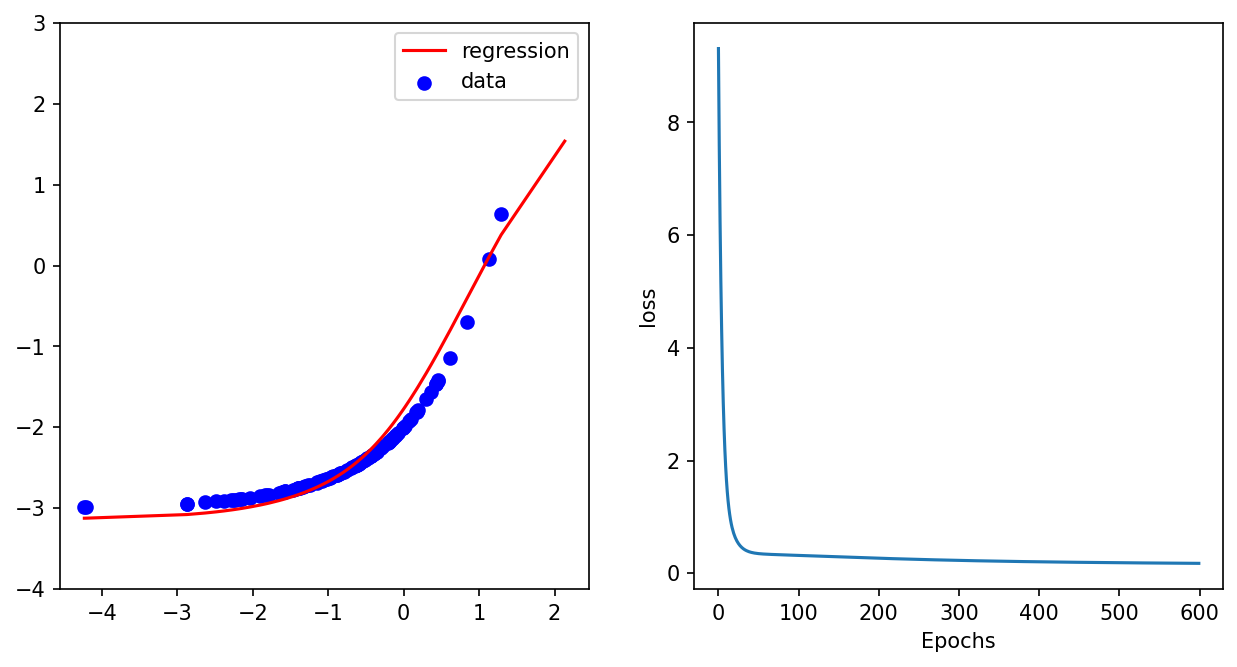

In [146]:
# training data
np.random.seed(1024)
random.seed(1024)
Epochs = 600
x = np.sort(np.random.normal(-1, 1.0, (100, 1)), axis=0).reshape(-1, 1)
y = np.exp(x) - 3

plt.figure(figsize=(10, 5), dpi=150)

input_dims = 1
output_dims = 1
hidden_num = 10
lr = 2e-4

BP_model = MyBPNetwork(input_dims=input_dims,
                       output_dims=output_dims,
                       hidden_dims=hidden_num,
                       lr=lr)


loss_list = []
for e in range(1, Epochs+1):

    # 预测
    pred_ = BP_model.forward(x)
    # 反向传播
    BP_model.backward(y, pred_)
    # 优化
    BP_model.optimize()
    
    loss = np.mean((pred_ - y) ** 2)
        
    loss_list.append(loss)
    if e % 40 == 0:
        print("epoch-%i \tloss: %.4f" % (e, loss))

    # 记录图片
    if e % 10 == 0:
        plt.cla()
        plt.clf()
        plt.subplot(1, 2, 1)
        plt.ylim(-4, 3)
        plt.scatter(x.reshape(-1), y.reshape(-1), c="b", label="data")
        plt.plot(x.reshape(-1), pred_.reshape(-1), c="r", label="regression")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(loss_list)
        plt.xlabel("Epochs")
        plt.ylabel("loss")
        plt.savefig("./images/temp/{}.png".format(e), dpi=150)

with imageio.get_writer("./images/{}.gif".format("nonlinear_regression_BPNetwork"), mode="I", fps=2) as Writer:
    for ind in range(1, Epochs+1):
        if ind % 10 == 0:
            image = imageio.imread("./images/temp/{}.png".format(ind))
            os.remove("./images/temp/{}.png".format(ind))
            Writer.append_data(image)

plt.show()

#### 训练过程

![moons](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/nonlinear_regression_BPNetwork.gif "segment")